<a href="https://colab.research.google.com/github/raphamatoss/DeepLearningWithPyTorch/blob/main/PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data: prepare and load
2. Build a model
3. Fit the model to the data(training)
4. Make predictions and evaluate a model
5. Save and load a model
6. Put it all together

In [ ]:
import torch
from torch import nn # nn contains all of PyTorcg's building blocks for neural networks
import matplotlib.pyplot as plt

**1. DATA**

Data can be almost everything:
- DNA
- Imagens
- Music
- Text

We need to turn data into numbers and then build a model to learn patters in the numbers.
To showcase this, let´s create some known data using the linear regression formula. We'll make a straight line with know parameters.

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

**Splitting Data**

Training and testing sets are essencial in ML/DL, this division allow us to evaluate our model. There is also often a validation set, but it's not mandatory.

In [ ]:
# Create a train/test split
train_split =  int(0.8 * len(X))
X_train, y_train =  X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# Let's create a function to visualize our data!
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))

  ### Plot training data in blue
  # matplotlib.pyplot.scatter takes (x=train_data, y=train_label) as the data position
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training set")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing set")

  if predictions is not None:
    # Plot the predictions in red(predictions made on the test data)
    numpy_predictions = predictions.detach().numpy()
    plt.scatter(test_data, numpy_predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})


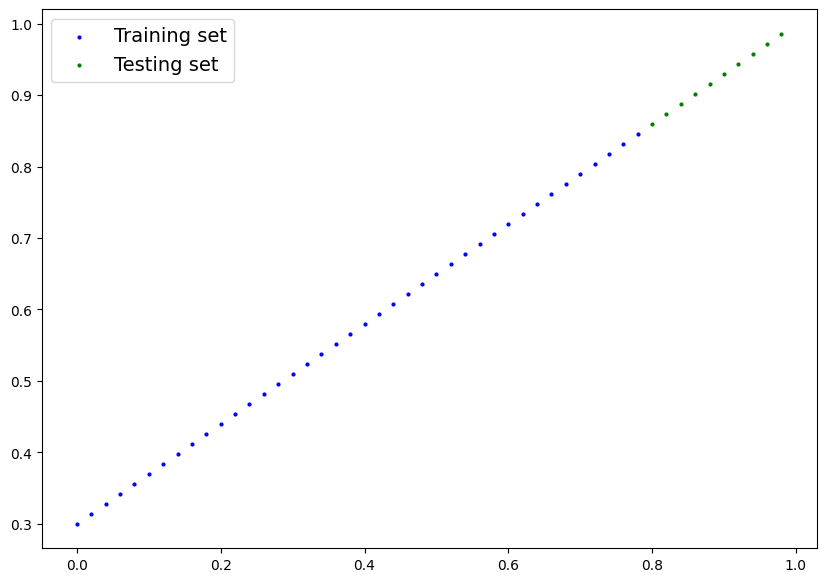

In [ ]:
plot_predictions()

**2. Build a Model**

First PyTorch model


In [ ]:
import torch
from torch import nn

# creating a linear regression model class
class LinearRegressionModel(nn.Module): #nn.Module is a superclass to all models  in PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True))

  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias


**PyTorch Model Building Essentials**

`torch.nn` contains all of the building blocks for computational graphs

`torch.nn.Parameter` what a should model try and learn, often a PyTorch layer from torch.nn will set these for us

`torch.nn.Module` the super class for all neural network classes, if we subclass it, we should overwrite forward()

`torch.optim` the optimizers implemented by PyTorch

`def forward()` all nn.Module subclasses requires the method to be overwritten, this method defines what happens in the forward computation

**Checking the contents of our PyTorch model**

We can check our model parameters using `.parameters()`

In [ ]:
torch.manual_seed(0)

model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([0.4963], requires_grad=True),
 Parameter containing:
 tensor([0.7682], requires_grad=True)]

In [ ]:
# List named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.4963])), ('bias', tensor([0.7682]))])

**Making predictions using  `torch.inference_mode()`**

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`. When we pass data through our model, its going to tun it through the `forward()` method.

In [ ]:
with torch.inference_mode(): # inference mode disables background functions such as backpropagation
  y_preds = model(X_test)

y_preds

tensor([[1.1652],
        [1.1752],
        [1.1851],
        [1.1950],
        [1.2049],
        [1.2149],
        [1.2248],
        [1.2347],
        [1.2446],
        [1.2546]])

In [ ]:
# we could also use:
y_preds = model(X_test)
y_preds

tensor([[1.1652],
        [1.1752],
        [1.1851],
        [1.1950],
        [1.2049],
        [1.2149],
        [1.2248],
        [1.2347],
        [1.2446],
        [1.2546]], grad_fn=<AddBackward0>)

In [ ]:
# what we expected:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

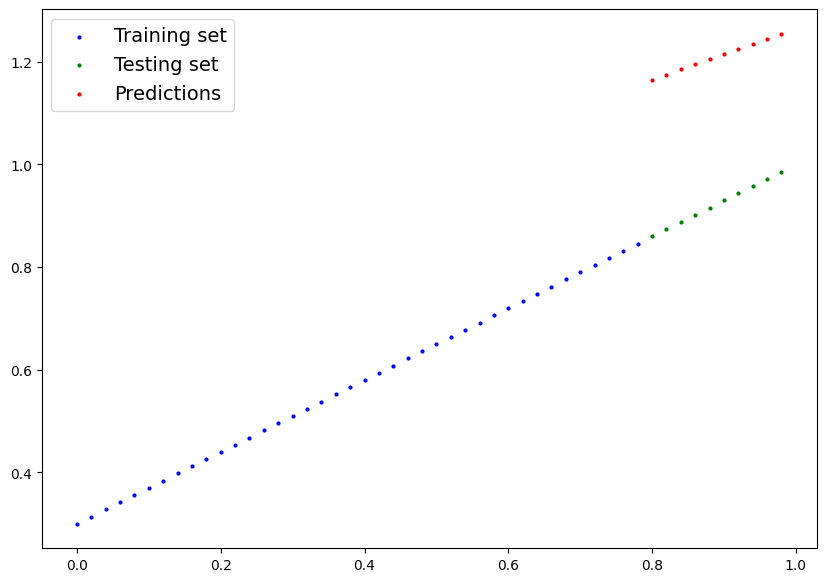

In [ ]:
plot_predictions(predictions=y_preds)

**3. Training a model**

The concept of training a model is to move from some unknown parameters(probably random) to some known parameters that better represents our data

One way to measure how poor our models predictions are is to use a loss function, also called cost function.

*Loss Function:* a function that measures how wrong the model's predictions are to the ideal output. Lower is better.

*Optimizer:* takes the loss of the model and adjust the model's parameters to reduce the loss

With PyTorch we nedd:
- A training loop
- A testing loop